# Python Ecosystem for Geospatial Data Analysis



In [ ]:
#Data Paths

image = '/content/drive/MyDrive/RAW DATA/UG.tif'
farm_shp = '/content/drive/MyDrive/RAW DATA/webinar/POLYGON.shp'
farm_geosjson = 'https://raw.githubusercontent.com/korykorir/EO_processing/refs/heads/main/farm.geojson'
farm_wkt = 'https://raw.githubusercontent.com/korykorir/EO_processing/refs/heads/main/farm.csv'
ecaas = '/content/drive/MyDrive/RAW DATA/webinar/ECAAS_KEN_SHPs/kenya_ecaas_shps.shp'

- Imagery Download

[https://github.com/korykorir/EO_processing/blob/main/UG.tif]

When you open the link above, click, ***View Raw***  and the Raster image will be downloaded.

- Shapefile download

[https://github.com/korykorir/EO_processing/blob/main/farm.zip]

When you open the link above, click, ***View Raw***  and the Zipped Shapefile will be downloaded.

- ECAAS Download

[https://drive.google.com/file/d/1Hm5K97ssH_82eUZViw3JWGHx6Uar2KoO/view?usp=drive_link]

Click on the link and download the shapefiles for farms in Kenya


1. GDAL(Geospatial Data Abstraction  Library)

GDAL is an open source library for readind, writing and processing raster and vector geospatial data formats.
Some of these data formats include GeoTiff for Raster and Shapefiles for Vector

* Metadata Extraction
* Reading and writing raster and vector data
* Reprojection
* clipping of datasets


2. Rasterio

This is a python library for reading and writing raster data.
It is built on top of GDAL and simplifies tasks like masking ,resampling

Some of teh functionalities include;
* Reading and writing raster files
* Extracting metadata
* Masking rasters using vestor gemetries




In [ ]:
%%capture
if 'google.colab' in str(get_ipython()):
  !pip install rasterio geopandas  pyproj matplotlib numpy pandas
  !pip install rioxarray


{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 657, 'height': 608, 'count': 19, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(8.983152841195215e-05, 0.0, 35.35472514250677,
       0.0, -8.983152841195215e-05, 0.8987644417615812)}


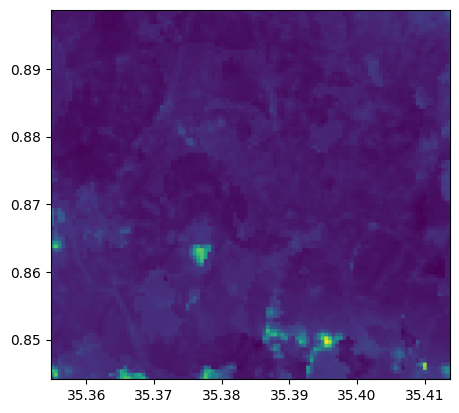

In [ ]:
#

import rasterio as rio
from rasterio.plot import show

#Open the raster file
with rio.open(image) as src:
  #access the metadata
  print(src.meta)
  #plot the raster data
  show(src)


3. Geopandas

Geopandas (From the word Pandas) - allows spatial operations on geometric data and integrates seamlessly with the other Python Libraries like matplotlib.
Some of the key functionalities include;
* Loading and manipulating vector data
* Spatial joins
* geometric operations like buffering and intersection




                                                 WKT  \
0  MULTIPOLYGON (((35.371625975655 0.860583581859...   

                                            geometry  
0  MULTIPOLYGON (((35.37163 0.86058, 35.36995 0.8...  
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   WKT       1 non-null      object  
 1   geometry  1 non-null      geometry
dtypes: geometry(1), object(1)
memory usage: 148.0+ bytes
None


<Axes: >

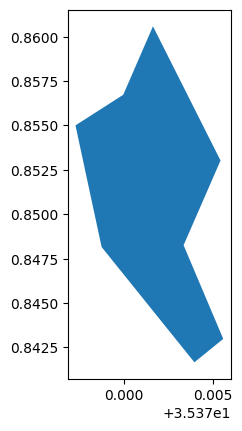

In [ ]:
import geopandas as gpd

#load a shapefile
# gdf = gpd.read_file(farm_geosjson)
# gdf = gpd.read_file(farm_shp)
gdf = gpd.read_file(farm_wkt)

#EDA on the data
print(gdf.head())
print(gdf.info())

#plot the data
gdf.plot()

4. Xarrays

Xarray is a powerful Python library primarily designed for working with multi-dimensional labeled arrays, making it ideal for handling satellite imagery data.

**Rioxarray** : it is an extension of Xarray for raster data, to read and process satellite imagery



In [ ]:
import xarray as xr
import rioxarray as rxr

ds = rxr.open_rasterio(image)

# Print dataset info
print(ds)


<xarray.DataArray (band: 19, y: 608, x: 657)> Size: 30MB
[7589664 values with dtype=float32]
Coordinates:
  * band         (band) int64 152B 1 2 3 4 5 6 7 8 9 ... 12 13 14 15 16 17 18 19
  * x            (x) float64 5kB 35.35 35.35 35.35 35.36 ... 35.41 35.41 35.41
  * y            (y) float64 5kB 0.8987 0.8986 0.8985 ... 0.8444 0.8443 0.8442
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      ('B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', '...


Extract and visualize a specific Band

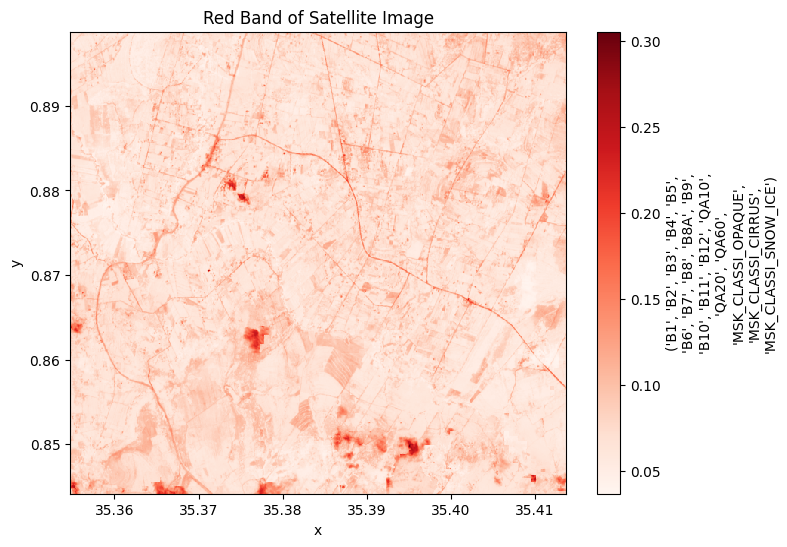

In [ ]:
import matplotlib.pyplot as plt

# Select the Red band
red_band = ds.sel(band=4)

# Plot the band
plt.figure(figsize=(8, 6))
red_band.plot(cmap="Reds")
plt.title("Red Band of Satellite Image")
plt.show()


Compute NDVI

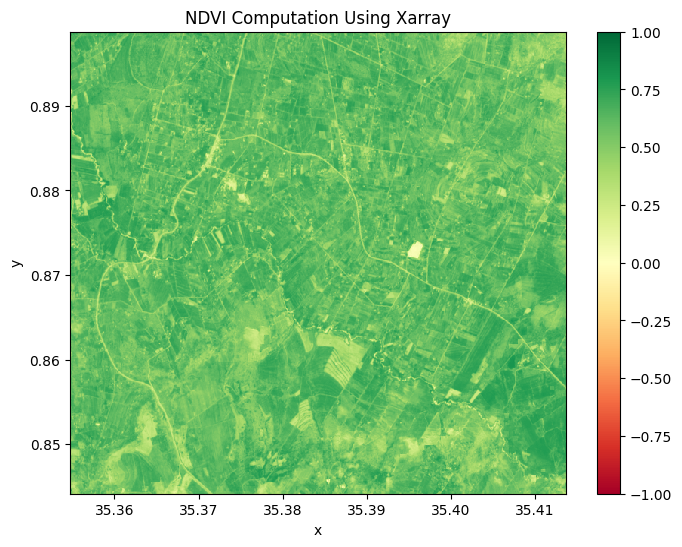

In [ ]:
# Select Near-Infrared (NIR) and Red bands
nir = ds.sel(band=8).astype(float)
red = ds.sel(band=4).astype(float)

# Compute NDVI
ndvi = (nir - red) / (nir + red)

# Plot NDVI
plt.figure(figsize=(8, 6))
ndvi.plot(cmap="RdYlGn", vmin=-1, vmax=1)
plt.title("NDVI Computation Using Xarray")
plt.show()


Resampling

In [ ]:
# Reduce resolution by a factor of 2
ds_resampled = ds.coarsen(x=2, y=2, boundary="trim").mean()

# Print new resolution
print(ds_resampled.shape)


(19, 304, 328)


# Basic Preprocessing Workflow
1. Data ingestion
* Load both Raster and Vector datasets using Rasterio and GeoPandas
* Ensuring all the datasets are in the same format and projection

In [ ]:
#Load raster data
with rio.open(image) as src:
  raster_data = src.read()

#Load Vector data
gdf = gpd.read_file(farm_geosjson)

2. Reprojection
* To align datasets to a common coordinate reference system(crs) to ensure accurate spatial analysis


In [ ]:
#transform the Vector files to another projection
print(gdf.crs)

EPSG:4326


In [ ]:

gdf_reprojected = gdf.to_crs(epsg=32637)
print(gdf_reprojected.crs)



EPSG:32637


3. Clipping
* To only focus on the area of interest

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 657, 'height': 608, 'count': 19, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(8.983152841195215e-05, 0.0, 35.35472514250677,
       0.0, -8.983152841195215e-05, 0.8987644417615812)}


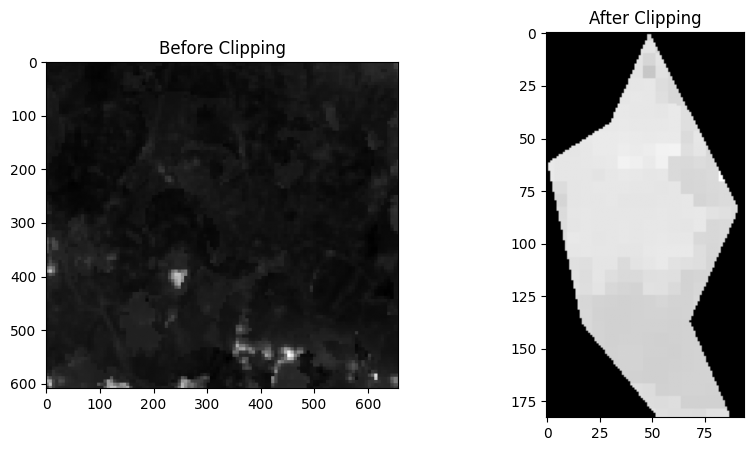

In [ ]:
from rasterio.mask import mask
from matplotlib import pyplot as plt

#load vector boudary
gdf = gpd.read_file(farm_wkt)

#Clip raster
with rio.open(image) as src:
  out_image, out_transform = mask(src, gdf.geometry, crop=True)
  out_meta = src.meta.copy()
  print(out_meta)

#Update metadata
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

#save clipped raster
with rio.open('clipped_raster.tif', 'w', **out_meta) as dest:
    dest.write(out_image)

#plot raster before and after clipping
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(raster_data[0], cmap='gray')
axs[0].set_title('Before Clipping')
axs[1].imshow(out_image[0], cmap='gray')
axs[1].set_title('After Clipping')
plt.show()


4. Resampling
* Align datasets with different solutions


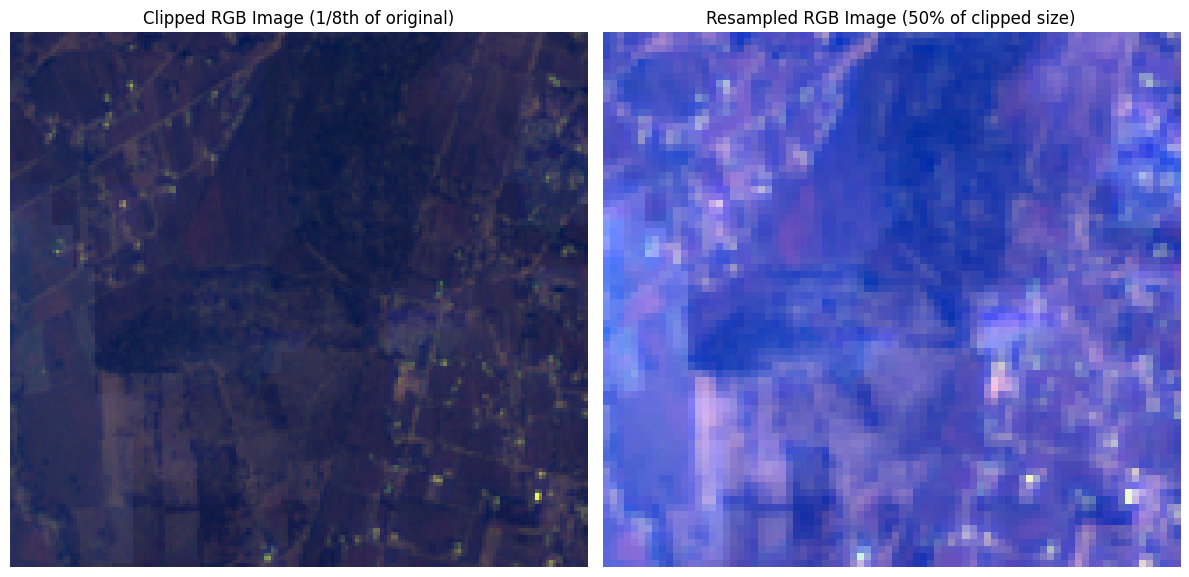

In [ ]:

from rasterio.enums import Resampling
import numpy as np

with rio.open(image) as src:
    width, height = src.width, src.height

    # Define window to clip 1/8th of the image (top-left corner)
    clip_window = rio.windows.Window(0, 0, width // 4, height // 4)

    # Read the clipped portion
    clipped_rgb = src.read([3, 2, 1], window=clip_window)

    # Get new dimensions for resampling
    new_height = int(clip_window.height * 0.5)
    new_width = int(clip_window.width * 0.5)

    # Resample the clipped image
    resampled_rgb = src.read(
        [3, 2, 1],
        out_shape=(3, new_height, new_width),
        resampling=Resampling.bilinear,
        window=clip_window
    )

# Normalize for visualization(0-1)
def normalize(arr):
    arr = arr.astype(np.float32)
    return (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

clipped_rgb = normalize(clipped_rgb)
resampled_rgb = normalize(resampled_rgb)

# Plot clipped and resampled images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Clipped image (1/8th of original)
axs[0].imshow(clipped_rgb.transpose(1, 2, 0))
axs[0].set_title('Clipped RGB Image (1/8th of original)')
axs[0].axis("off")

# Resampled image (50% of clipped size)
axs[1].imshow(resampled_rgb.transpose(1, 2, 0))
axs[1].set_title('Resampled RGB Image (50% of clipped size)')
axs[1].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
print('Before sampling', clipped_rgb.shape)
print('After sampling', resampled_rgb.shape)

Before sampling (3, 152, 164)
After sampling (3, 76, 82)


# Quality Assurance Methods

* QA is important since it ensures data relibility and integrity.
* It helps idetify inconsistencies in data early on in the workflow.

Some of the common QA techniques include
- Visual inspection
- Statisctical checks
- Outliers dection
- Gap filling and smoothing(Time series data)
- Vegetative test(Time series data)

In [ ]:
#checking for NoData values

with rio.open(image) as src:
  raster_data = src.read()
  nodata = src.nodata

#count number of pixels
invalid_pixels = (raster_data == nodata).sum()
total_pixels = raster_data.shape[0] * raster_data.shape[1]
invalid_percentage = (invalid_pixels / total_pixels) * 100

print(invalid_percentage)

0.0


use [ECAAS](https://drive.google.com/drive/folders/1nEhHxWzsZxqozO2LZa-uUl6DoKNVYZVZ) data

In [ ]:
#Validating vector data

gdf = gpd.read_file(ecaas)
print(gdf.shape)



(1353, 14)


In [ ]:
#check for invalid geometries
invalid_geometries = gdf[~gdf.geometry.is_valid]

#print the invalid geometries
print(invalid_geometries.shape)



(23, 14)


<Axes: >

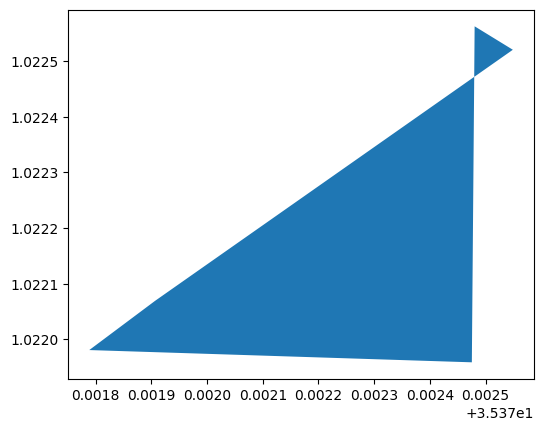

In [ ]:
#plot the invalid geometries
invalid_geometries.iloc[0:1].plot()

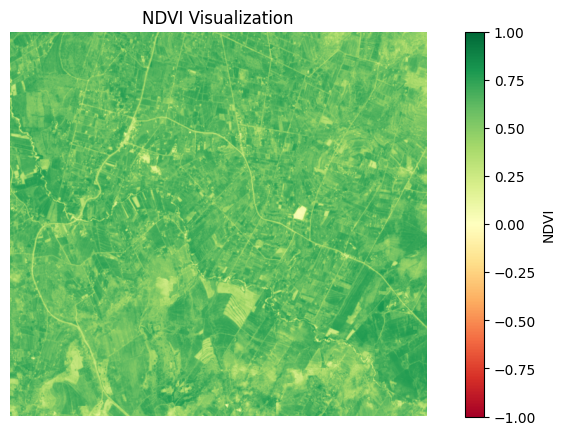

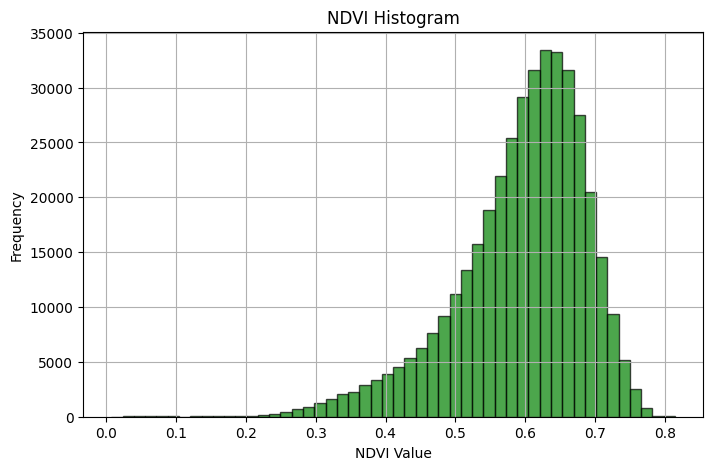

In [ ]:
#plotting raster image histogram

with rio.open(image) as src:
    # Read the Red and Near-Infrared (NIR) bands
    red_band = src.read(4).astype(float)
    nir_band = src.read(8).astype(float)

    # Avoid division by zero (set denominator to NaN where sum is zero)
    ndvi = (nir_band - red_band) / (nir_band + red_band)
    ndvi = np.where((nir_band + red_band) == 0, np.nan, ndvi)

# Plot NDVI image
plt.figure(figsize=(10, 5))
plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(label="NDVI")
plt.title("NDVI Visualization")
plt.axis("off")
plt.show()

# Plot histogram of NDVI values
plt.figure(figsize=(8, 5))
plt.hist(ndvi[~np.isnan(ndvi)], bins=50, color='green', alpha=0.7, edgecolor='black')
plt.title("NDVI Histogram")
plt.xlabel("NDVI Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
